In [1]:
!python3 -m pip install --upgrade sagemaker

from PIL import Image
from io import BytesIO

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import boto3

     |████████████████████████████████| 534 kB 14.2 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for sagemaker: filename=sagemaker-2.90.0-py2.py3-none-any.whl size=736782 sha256=0ced9a41c814da32e129cb965106c65a3d174e20d0cec39e22ed3e3a0b28dec7
  Stored in directory: /home/ec2-user/.cache/pip/wheels/83/16/d5/eece7aae29ad63ad1378c131e2e64d8a9fe35216e0f36fba94
Successfully built sagemaker
  Attempting uninstall: sagemaker
    Found existing installation: sagemaker 2.86.2
    Uninstalling sagemaker-2.86.2:
      Successfully uninstalled sagemaker-2.86.2


Using TensorFlow backend.


In [12]:
bucket = 'com-ktng-sales-image-poc'

# 그림3.jpg : ADV
# 그림2.jpg : CDU_L
# 그림6.jpg : CDU_S

key = 'datasets/20220511/그림6.jpg'
label = 'CDU_S'

s3_client = boto3.client('s3')
file = s3_client.get_object(Bucket=bucket, Key=key)

img = Image.open(BytesIO(file['Body'].read()))
data = img_to_array(img)



In [13]:
# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(
#     zoom_range=[0.8, 1.0],
    brightness_range=[0.3, 1.2],
    rotation_range=10,
#     horizontal_flip=True,
#     vertical_flip=True,
    height_shift_range=0.3,
#     width_shift_range=0.5
    
#     featurewise_center=True,
#     samplewise_center=True,
#     featurewise_std_normalization=True,
#     samplewise_std_normalization=True,
#     zca_whitening=True,
#     zca_epsilon=1e-06,
#     rotation_range=20,
#     width_shift_range=0.0,
#     height_shift_range=0.0,
#     brightness_range=None,
#     shear_range=0.5,
#     zoom_range=0.1, # 사용
#     channel_shift_range=0.5,
#     fill_mode='nearest',
#     cval=0.5,
#     horizontal_flip=False,
#     vertical_flip=False,
#     rescale=None,
#     preprocessing_function=None,
#     data_format=None,
#     validation_split=0.0,
#     dtype=None
)



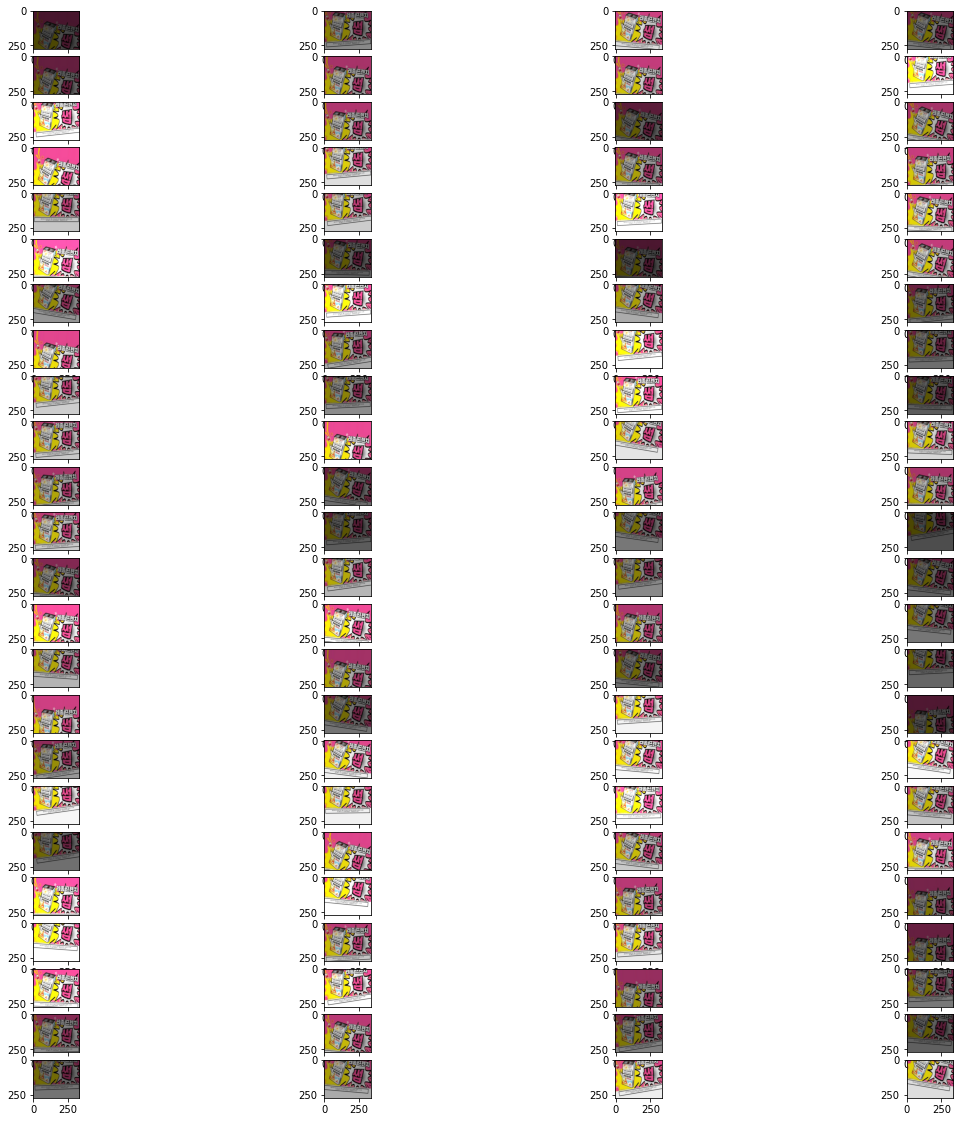

In [14]:
# prepare iterator
it = datagen.flow(samples, batch_size=1)

# s3_config
bucket = 'com-ktng-sales-image-poc'
key_prefix = 'datasets/20220511-data-augmentation/'+label+'/'+label+'_01_'
content_type = 'image/jpeg'

# generate samples and plot
fig = plt.figure(figsize=(20, 20))
for i in range(96):
    # define subplot
    plt.subplot(24, 4, 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    
    file_name = label + '_01_' + str(i) + '.jpg'
    plt.imsave(file_name,image)
    s3_client.upload_file(file_name, bucket, key_prefix + str(i)+ '.jpg')
    
    # plot raw pixel data
    plt.imshow(image)

# show the figure
plt.show()